# SPECIO

In [16]:
%matplotlib notebook
from IPython.display import HTML, display, clear_output
import ipywidgets as widgets
import specio
import os
from glob import glob
import pandas as pd
import numpy as np

In [17]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Show code: <a href="javascript:code_toggle()">on/off</a>.''')

In [18]:
display(HTML('''<style>.widget-label { min-width: 20ex !important; }</style>''')) #widget label width
display(HTML("<style>.container { width:100% !important; }</style>")) #cell width

In [19]:
#CSS = """.output { flex-direction: row;}"""
#HTML('<style>{}</style>'.format(CSS))

SEJveChjaGlsZHJlbj0oQnV0dG9uKGRlc2NyaXB0aW9uPXUnUXVlcnknLCBzdHlsZT1CdXR0b25TdHlsZSgpKSwgRHJvcGRvd24oZGVzY3JpcHRpb249dSdUZWxlc2NvcGUnLCBpbmRleD0yLCDigKY=


Callisto Sp0544-2433 I+z SP000000 2018-03-02 



<IPython.core.display.Javascript object>


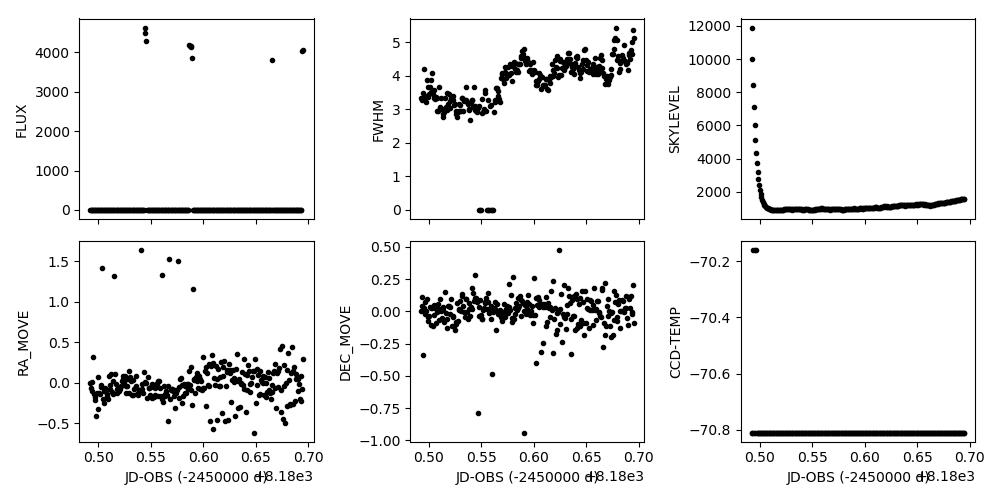

,DATE,NUM_IMAGES
0,2018-02-03,348
1,2018-02-05,322
2,2018-02-11,332
3,2018-02-12,329
4,2018-02-21,305
5,2018-02-22,307
6,2018-02-23,308
7,2018-02-24,306
8,2018-02-25,303
9,2018-02-28,289


In [29]:
#::: telescope drowndown widget
telescope_w = widgets.Dropdown(
    options=['Io','Europa','Callisto','Ganymed'],
    value='Callisto',
    description='Telescope'
)
#display(telescope_w)


#::: read available fields and filters for this telescope
def get_field_and_filter_w_options():
    telescope = telescope_w.value
    try:
        buf = glob( os.path.join(specio.root(telescope), '*_output.fts') )
        fields_and_filters = [ item.split('/')[-1][0:-11] for item in buf ]
        return fields_and_filters
    except:
        return ['No data available']


#::: fields and filters dropdown widget
field_and_filter_w = widgets.Dropdown(
    options=get_field_and_filter_w_options(),
    description='Fields and filters'
)
#display(field_and_filter_w)
#field_name, filter_band = field_and_filter_w.value.split('_')


#::: read available obj_ids for this telescope, field and filter
def get_obj_id_w_options():
    telescope = telescope_w.value
    try:
        field_name, filter_band = field_and_filter_w.value.split('_')
        dic = specio.get(telescope, field_name, filter_band, ['OBJ_ID'], silent=True)
        obj_ids = list(dic['OBJ_ID'])
        return obj_ids
    except:
        return ['No data available']
        

#::: OBJ_IDs dropdown widget
obj_id_w = widgets.Dropdown(
    options=get_obj_id_w_options(),
    description='Object ID'
)
#display(obj_id_w)
#obj_id = obj_id_w.value


#::: read available obj_ids for this telescope, field and filter
def get_date_w_options():
    try:
        telescope = telescope_w.value
        field_name, filter_band = field_and_filter_w.value.split('_')
        obj_id = obj_id_w.value
        dic = specio.get(telescope, field_name, filter_band, ['STATS'], silent=True)
        #print dic
        dates = ['all'] + list(dic['STATS'][0])
        Nimages = [str(np.sum(dic['STATS'][1]))] + [ str(item) for item in dic['STATS'][1] ]
        date_Nimages = [ item0+'    ('+item1+' img)' for item0, item1 in zip(dates, Nimages)   ]
        return date_Nimages
    except:
        return ['No data available']
        

#::: date dropdown widget
date_w = widgets.Dropdown(
    options=get_date_w_options(),
    description='Date'
)
#display(date_w)
#date = date_w.value


def get_output_w_value():
    try:
        dic = specio.get(telescope_w.value, field_and_filter_w.value.split('_')[0], field_and_filter_w.value.split('_')[1], ['STATS'], silent=True)
        return str(len(dic['STATS'][0])) + ' nights, ' + str(np.sum(dic['STATS'][1])) + ' images'
    except:
        return 'No data available'
    

#::: stats output widget
output_w = widgets.Text(
    value=get_output_w_value(),
    placeholder='',
    description='    ',
    disabled=True
)


#::: selection changes, update dropdown menus
def update_dropdown_menus(b):
    field_and_filter_w.options = get_field_and_filter_w_options()
    obj_id_w.options = get_obj_id_w_options()
    date_w.options = get_date_w_options()
    output_w.value = get_output_w_value()
    
    
#::: selection changes, update dropdown menus
telescope_w.observe(update_dropdown_menus)
field_and_filter_w.observe(update_dropdown_menus)
obj_id_w.observe(update_dropdown_menus)


#::: print stats as html table
def print_stats_html_table(telescope, field_name, filter_band):
    dic = specio.get(telescope, field_name, filter_band, ['STATS'], silent=True)
    pdic = pd.DataFrame( data={'DATE':dic['STATS'][0], 'NUM_IMAGES':dic['STATS'][1]} )
    display(pdic)
        
    
#::: run
def run(b):
    clear_output()
    display(hbox)  
    #display(telescope_w)
    #display(field_and_filter_w)
    #display(obj_id_w)
    #display(date_w)
    try:
        telescope = telescope_w.value
        field_name, filter_band = field_and_filter_w.value.split('_')
        obj_id = obj_id_w.value
        date = date_w.value[0:10]
        print telescope, field_name, filter_band, obj_id, date, '\n'
        if date=='all':
            fig_overview, axes_overview = specio.plot_overview(telescope, field_name, filter_band, obj_id=obj_id)
        else:   
            fig_overview, axes_overview = specio.plot_overview(telescope, field_name, filter_band, obj_id=obj_id, time_date=date)
    except:
        print("No data available")
        

def run2(b):
    try:
        telescope = telescope_w.value
        field_name, filter_band = field_and_filter_w.value.split('_')
        obj_id = obj_id_w.value
        date = date_w.value[0:10]
        print_stats_html_table(telescope, field_name, filter_band)
    except:
        pass
    
        
#::: run button
button = widgets.Button(description="Query")
#display(button)
button.on_click(run)
button.on_click(run2)


#::: combine all widgets in an hbox
hbox = widgets.HBox([button, telescope_w, field_and_filter_w, obj_id_w, date_w, output_w])


#::: display all widgets
display(hbox)